# Career_Switch_Prediction_Dataset

In [ ]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Metrics
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, roc_auc_score, roc_curve
)

# Neural Network
from sklearn.neural_network import MLPClassifier

# Settings
sns.set(style="whitegrid")


In [ ]:
from google.colab import files
files.upload()


TypeError: 'NoneType' object is not subscriptable

In [ ]:
import pandas as pd
df = pd.read_csv("Career_Switch_Prediction_Dataset.csv")
df.head()



In [ ]:
print("Dataset Shape:", df.shape)
print("\nDataset Info:\n")
df.info()


Dataset Shape: (5000, 14)

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             5000 non-null   int64  
 1   city                    5000 non-null   object 
 2   city_development_index  5000 non-null   float64
 3   gender                  3887 non-null   object 
 4   relevent_experience     5000 non-null   object 
 5   enrolled_university     4893 non-null   object 
 6   education_level         4882 non-null   object 
 7   major_discipline        4276 non-null   object 
 8   experience              4989 non-null   object 
 9   company_size            3429 non-null   object 
 10  company_type            3379 non-null   object 
 11  last_new_job            4896 non-null   object 
 12  training_hours          5000 non-null   int64  
 13  will_change_career      5000 non-null   int64  
dty

In [ ]:
df.describe(include="all")


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,will_change_career
count,5000.000000,5000,5000.000000,3887,5000,4893,4882,4276,4989,3429,3379,4896,5000.000000,5000.000000
unique,NaN,113,NaN,3,2,3,5,6,22,8,6,6,NaN,NaN
top,NaN,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,NaN,NaN
freq,NaN,1163,NaN,3507,3598,3571,3037,3786,859,813,2550,2094,NaN,NaN
mean,17022.883000,NaN,0.829410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.027200,0.252400
std,9656.969716,NaN,0.122429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.946693,0.434433
min,7.000000,NaN,0.448000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000
25%,8736.500000,NaN,0.743000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,0.000000
50%,17068.000000,NaN,0.903000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,0.000000
75%,25389.250000,NaN,0.920000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.000000,1.000000


In [ ]:
#Target column: Will_change_career
target_column = df.columns[-1]

print("Target Column:", target_column)
print("Target Value Counts:\n")
print(df[target_column].value_counts())


Target Column: will_change_career
Target Value Counts:

will_change_career
0    3738
1    1262
Name: count, dtype: int64


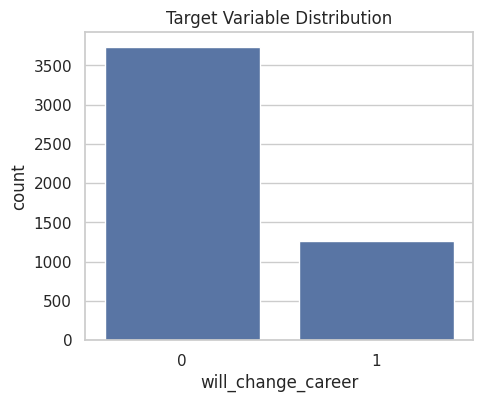

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='will_change_career', data=df)
plt.title("Target Variable Distribution")
plt.show()

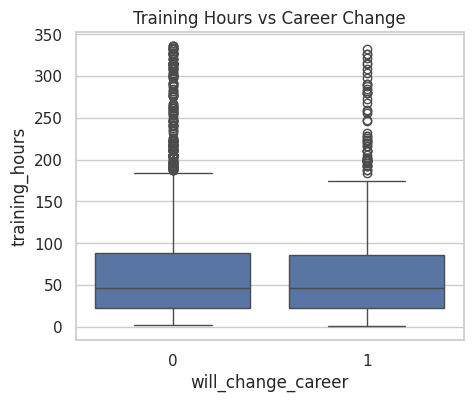

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(x='will_change_career', y='training_hours', data=df)
plt.title("Training Hours vs Career Change")
plt.show()

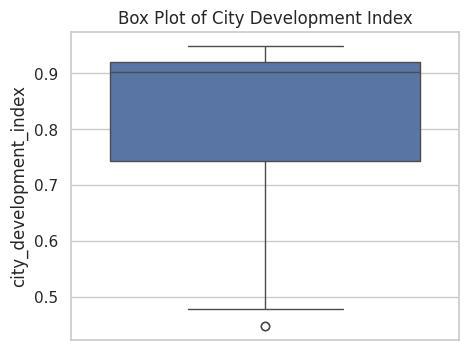

In [ ]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['city_development_index'])
plt.title("Box Plot of City Development Index")
plt.show()


In [ ]:
X = df.drop(columns=[target_column])
y = df[target_column]

print("Feature Matrix Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Matrix Shape: (5000, 13)
Target Shape: (5000,)


In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features:\n", categorical_features)
print("\nNumerical Features:\n", numerical_features)


Categorical Features:
 Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'experience', 'company_size',
       'company_type', 'last_new_job'],
      dtype='object')

Numerical Features:
 Index(['enrollee_id', 'city_development_index', 'training_hours'], dtype='object')


In [ ]:
# Number of data points and features
num_rows, num_cols = df.shape

print("Number of data points:", num_rows)
print("Number of features (including target):", num_cols)
print("Number of input features:", num_cols - 1)


Number of data points: 5000
Number of features (including target): 14
Number of input features: 13


In [ ]:
print("Target column:", target_column)
print("Target data type:", df[target_column].dtype)
print("\nUnique target values:")
print(df[target_column].unique())


Target column: will_change_career
Target data type: int64

Unique target values:
[1 0]


In [ ]:
print("Numerical feature count:", len(numerical_features))
print("Categorical feature count:", len(categorical_features))


Numerical feature count: 3
Categorical feature count: 10


In [ ]:
df_corr = df.copy()

label_encoders = {}
for col in df_corr.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))
    label_encoders[col] = le


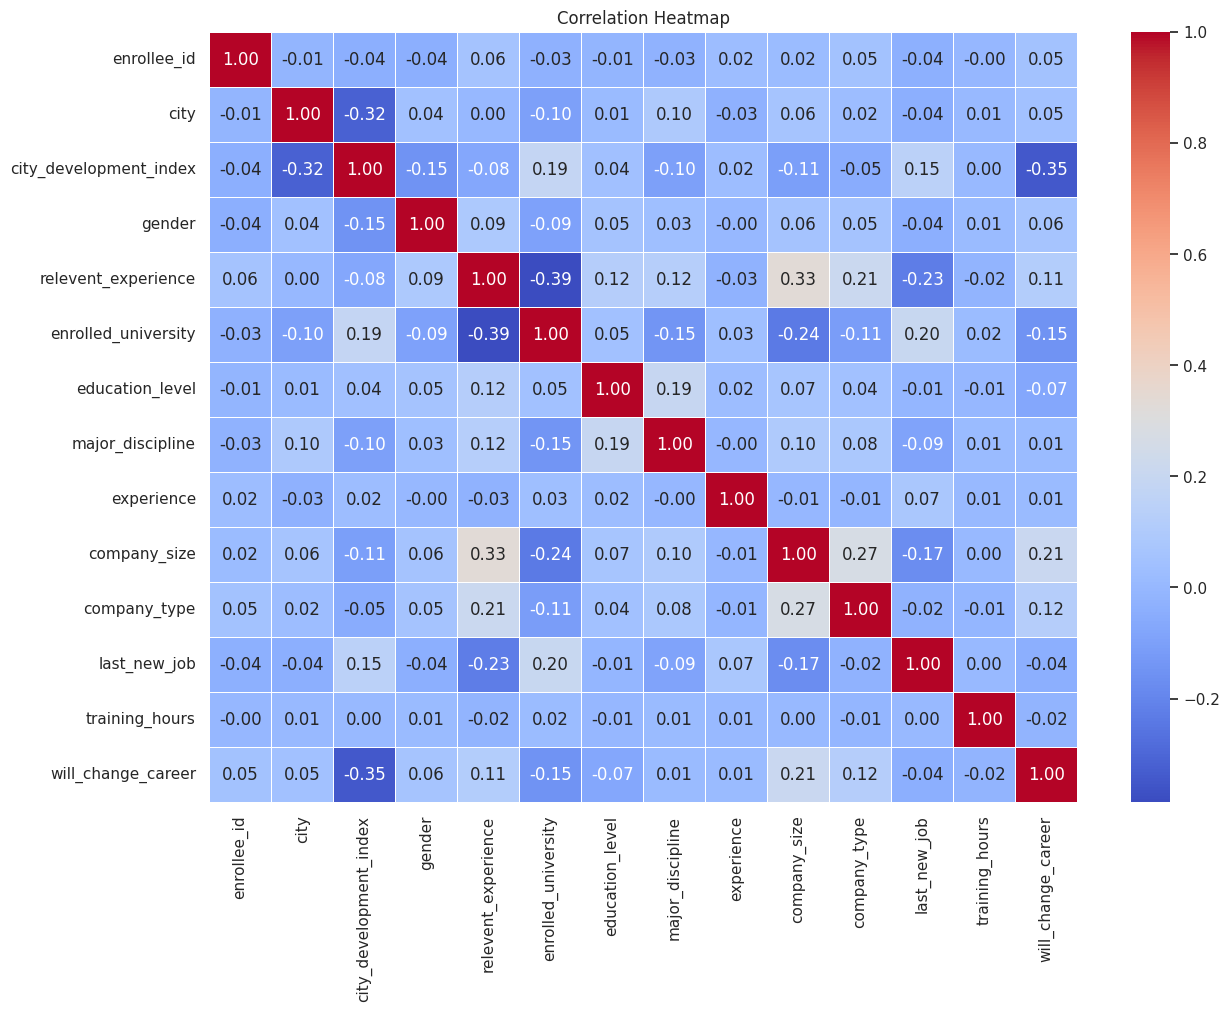

In [ ]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    df_corr.corr(),
    cmap="coolwarm",
    annot=True,          # <-- show numbers
    fmt=".2f",           # 2 decimal places
    linewidths=0.5
)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
class_counts = df[target_column].value_counts()
print(class_counts)


will_change_career
0    3738
1    1262
Name: count, dtype: int64


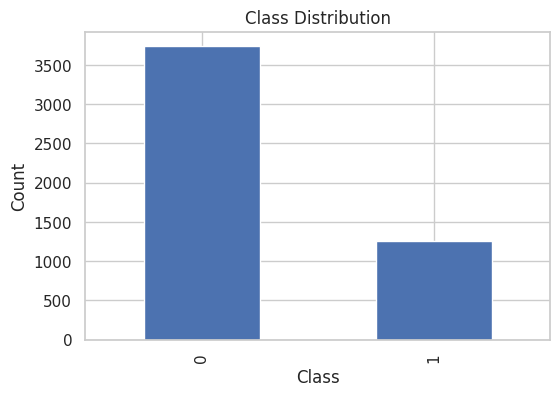

In [ ]:
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [ ]:
df.isnull().sum()


,0
enrollee_id,0
city,0
city_development_index,0
gender,1113
relevent_experience,0
enrolled_university,107
education_level,118
major_discipline,724
experience,11
company_size,1571


In [ ]:
num_imputer = SimpleImputer(strategy="mean")
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])


NameError: name 'SimpleImputer' is not defined

In [ ]:
cat_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])


In [ ]:
df_encoded = df.copy()

for col in categorical_features:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [ ]:
scaler = StandardScaler()

X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

X_scaled = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (4000, 13)
Test size: (1000, 13)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_acc = accuracy_score(y_test, knn_pred)
knn_acc


0.719

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_acc


0.679

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_acc = accuracy_score(y_test, lr_pred)
lr_acc


0.761

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)

nb_acc = accuracy_score(y_test, nb_pred)
nb_acc


0.731

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

mlp_acc = accuracy_score(y_test, mlp_pred)
mlp_acc


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.724

In [ ]:
kmeans = KMeans(n_clusters=len(class_counts), random_state=42)
clusters = kmeans.fit_predict(X_scaled)

clusters


array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

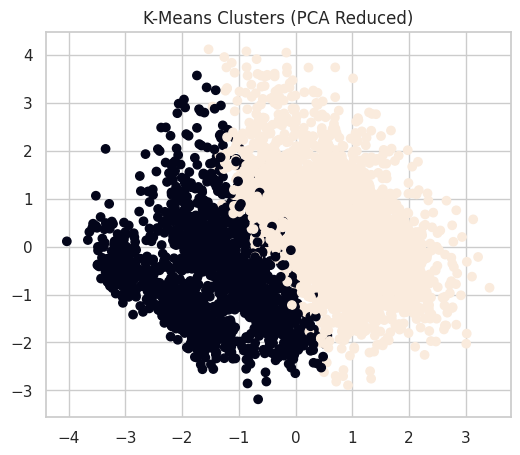

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.title("K-Means Clusters (PCA Reduced)")
plt.show()


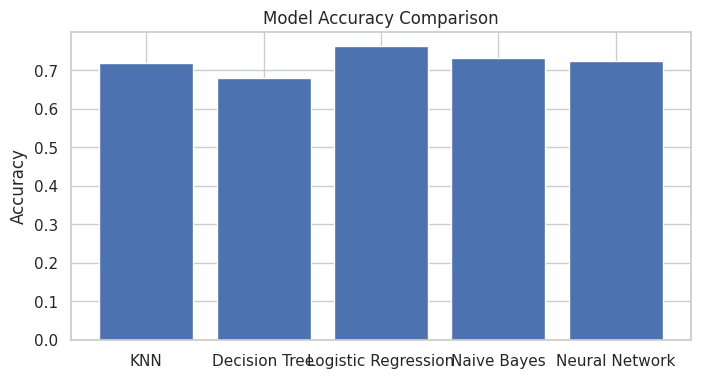

In [ ]:
models = ['KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Neural Network']
accuracies = [knn_acc, dt_acc, lr_acc, nb_acc, mlp_acc]

plt.figure(figsize=(8, 4))
plt.bar(models, accuracies)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [ ]:
for name, pred in zip(models, [knn_pred, dt_pred, lr_pred, nb_pred, mlp_pred]):
    print(name)
    print("Precision:", precision_score(y_test, pred, average='weighted'))
    print("Recall:", recall_score(y_test, pred, average='weighted'))
    print()


KNN
Precision: 0.6982279980888677
Recall: 0.719

Decision Tree
Precision: 0.6844686433063791
Recall: 0.679

Logistic Regression
Precision: 0.7306651428571429
Recall: 0.761

Naive Bayes
Precision: 0.7349301401736564
Recall: 0.731

Neural Network
Precision: 0.70764784426891
Recall: 0.724



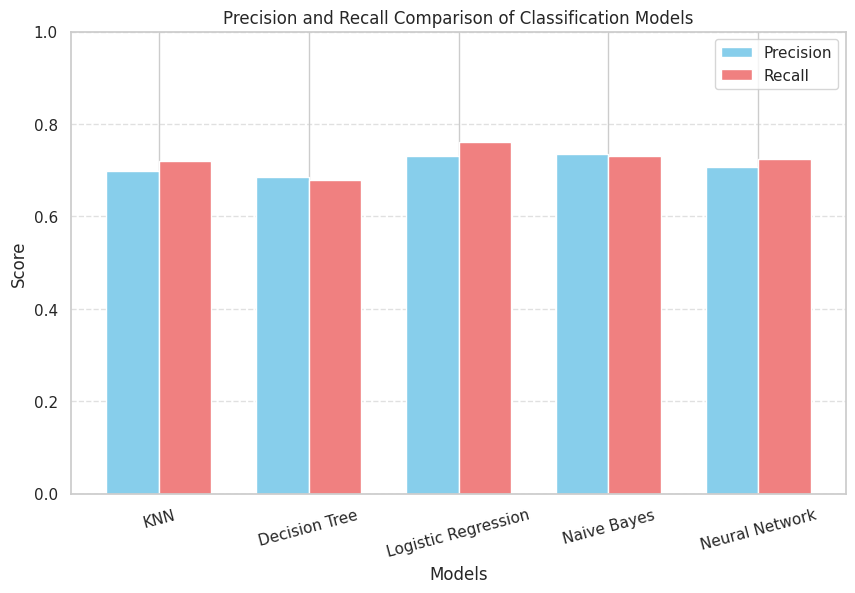

In [ ]:
# Model names
models = ['KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Neural Network']

precision = [0.6982279980888677, 0.6844686433063791, 0.7306651428571429, 0.7349301401736564, 0.70764784426891]
recall    = [0.719, 0.679, 0.761, 0.731, 0.724]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(10, 6))

plt.bar(x - width/2, precision, width, label='Precision', color='skyblue')
plt.bar(x + width/2, recall, width, label='Recall', color='lightcoral')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Precision and Recall Comparison of Classification Models')
plt.xticks(x, models, rotation=15)
plt.ylim(0, 1)
plt.legend()

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

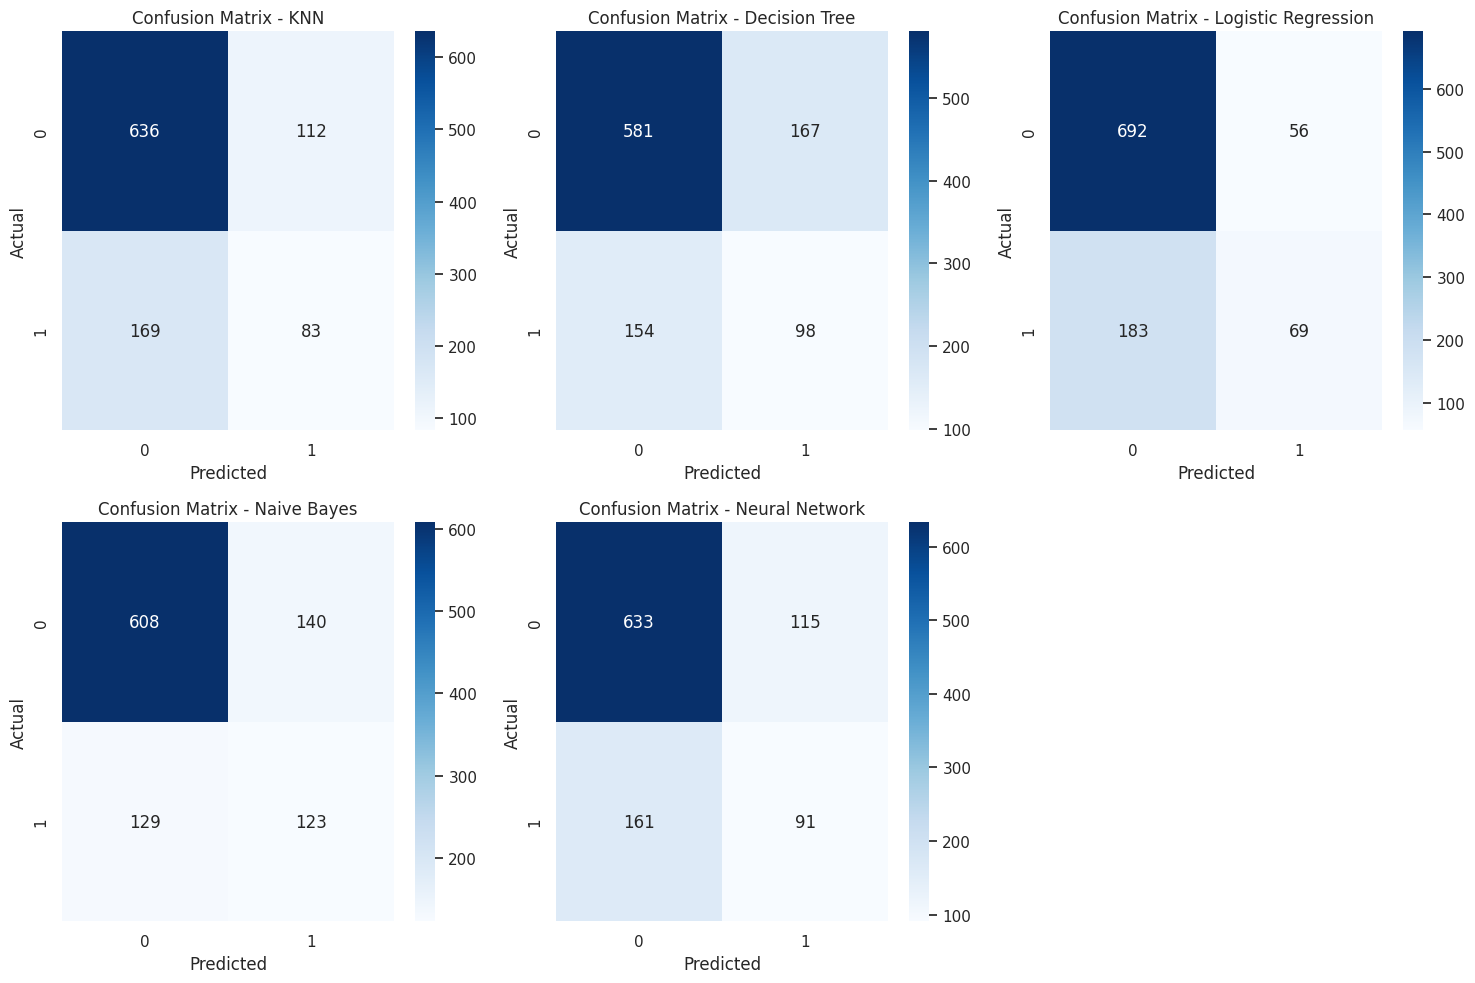

In [ ]:
model_predictions = {
    "KNN": knn_pred,
    "Decision Tree": dt_pred,
    "Logistic Regression": lr_pred,
    "Naive Bayes": nb_pred,
    "Neural Network": mlp_pred
}

plt.figure(figsize=(15, 10))

i = 1
for model_name, preds in model_predictions.items():
    plt.subplot(2, 3, i)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    i += 1

plt.tight_layout()
plt.show()


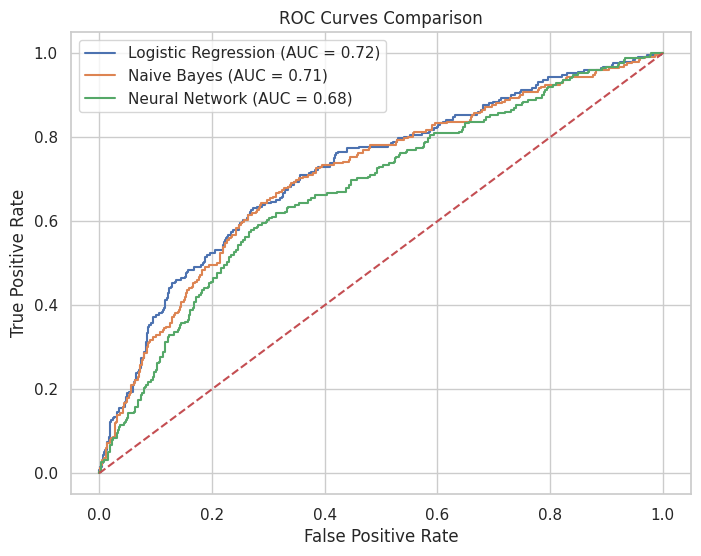

In [ ]:
plt.figure(figsize=(8, 6))

# Logistic Regression
lr_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, lr_probs)
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, lr_probs):.2f})")

# Naive Bayes
nb_probs = nb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, nb_probs)
plt.plot(fpr, tpr, label=f"Naive Bayes (AUC = {roc_auc_score(y_test, nb_probs):.2f})")

# Neural Network
mlp_probs = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, mlp_probs)
plt.plot(fpr, tpr, label=f"Neural Network (AUC = {roc_auc_score(y_test, mlp_probs):.2f})")

# Reference line
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()


In [ ]:
auc_scores = {
    "Logistic Regression": roc_auc_score(y_test, lr_probs),
    "Naive Bayes": roc_auc_score(y_test, nb_probs),
    "Neural Network": roc_auc_score(y_test, mlp_probs)
}

pd.DataFrame.from_dict(auc_scores, orient='index', columns=["AUC Score"])


,AUC Score
Logistic Regression,0.720185
Naive Bayes,0.709065
Neural Network,0.676120


from matplotlib import pyplot as plt
_df_0['AUC Score'].plot(kind='hist', bins=20, title='AUC Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AUC Score'].plot(kind='line', figsize=(8, 4), title='AUC Score')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
precision = np.array([0.6982279980888677, 0.6844686433063791,
                      0.7306651428571429, 0.7349301401736564,
                      0.70764784426891])

recall = np.array([0.719, 0.679, 0.761, 0.731, 0.724])

f1_scores = 2 * (precision * recall) / (precision + recall)

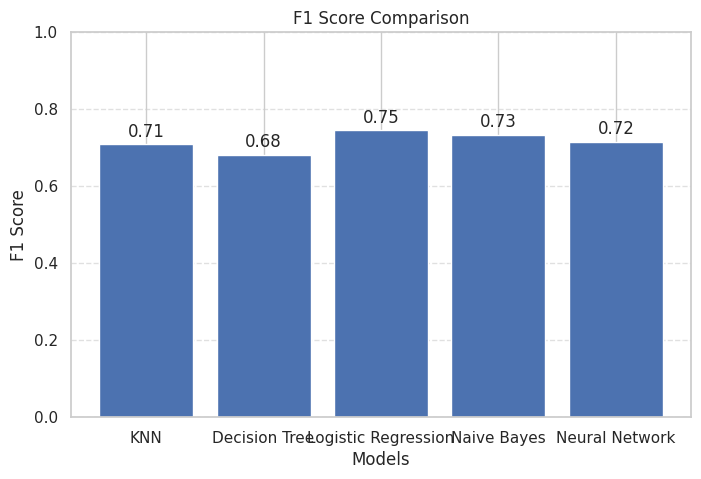

In [ ]:


models = ['KNN', 'Decision Tree', 'Logistic Regression', 'Naive Bayes', 'Neural Network']

plt.figure(figsize=(8, 5))
plt.bar(models, f1_scores)
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
plt.ylim(0, 1)

for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()